In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
x <- data.frame("SN" = 1:2, "Age" = c(21,15), "Name" = c("John", "Dora"), stringsAsFactors = FALSE)
x

SN,Age,Name
1,21,John
2,15,Dora


In [9]:
subset(x, subset = x$Age==21, select = Name)

Name
John


In [11]:
x['Age']

Age
21
15


In [13]:
x$SN

[1] 1 2

In [15]:
chicago <- readRDS("chicago.rds")

In [16]:
head(chicago)

city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,31.5,31.500,1987-01-01,NA,34.00000,4.250000,19.98810
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099
chic,33.0,27.375,1987-01-03,NA,34.16667,3.333333,23.81548
chic,29.0,28.625,1987-01-04,NA,47.00000,4.375000,30.43452
chic,32.0,28.875,1987-01-05,NA,NA,4.750000,30.33333
chic,40.0,35.125,1987-01-06,NA,48.00000,5.833333,25.77233


In [17]:
dim(chicago)

[1] 6940    8

In [18]:
str(chicago)

'data.frame':	6940 obs. of  8 variables:
 $ city      : chr  "chic" "chic" "chic" "chic" ...
 $ tmpd      : num  31.5 33 33 29 32 40 34.5 29 26.5 32.5 ...
 $ dptp      : num  31.5 29.9 27.4 28.6 28.9 ...
 $ date      : Date, format: "1987-01-01" "1987-01-02" ...
 $ pm25tmean2: num  NA NA NA NA NA NA NA NA NA NA ...
 $ pm10tmean2: num  34 NA 34.2 47 NA ...
 $ o3tmean2  : num  4.25 3.3 3.33 4.38 4.75 ...
 $ no2tmean2 : num  20 23.2 23.8 30.4 30.3 ...


In [20]:
subset <- select(chicago, city:dptp)
head(subset,2)

city,tmpd,dptp
chic,31.5,31.500
chic,33.0,29.875


In [21]:
s <- select(chicago, -(city:date))
head(s,1)

pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
NA,34,4.25,19.9881


In [22]:
subset <- select(chicago, ends_with("2"))
str(subset)

'data.frame':	6940 obs. of  4 variables:
 $ pm25tmean2: num  NA NA NA NA NA NA NA NA NA NA ...
 $ pm10tmean2: num  34 NA 34.2 47 NA ...
 $ o3tmean2  : num  4.25 3.3 3.33 4.38 4.75 ...
 $ no2tmean2 : num  20 23.2 23.8 30.4 30.3 ...


In [25]:
chic.f <- filter(chicago, pm25tmean2 > 25)
dim(chic.f)

[1] 381   8

In [26]:
chic <- filter(chicago, pm25tmean2 > 30 & tmpd > 80)
dim(chic)

[1] 17  8

In [27]:
ar <- arrange(chicago, date)

In [28]:
head(ar,1)

city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
chic,31.5,31.5,1987-01-01,NA,34,4.25,19.9881


In [29]:
chicago <- rename(chicago, dewpoint = dptp, pm25 = pm25tmean2)

In [30]:
head(chicago,2)

city,tmpd,dewpoint,date,pm25,pm10tmean2,o3tmean2,no2tmean2
chic,31.5,31.500,1987-01-01,NA,34,4.250000,19.98810
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099


In [31]:
chicago <- mutate(chicago, pm25detrend = pm25 - mean(pm25, na.rm = TRUE))
head(chicago,2)

city,tmpd,dewpoint,date,pm25,pm10tmean2,o3tmean2,no2tmean2,pm25detrend
chic,31.5,31.500,1987-01-01,NA,34,4.250000,19.98810,NA
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099,NA


In [33]:
chicago <- mutate(chicago, year = as.POSIXlt(date)$year + 1900)

In [35]:
years <- group_by(chicago, year)
head(years,2)
str(years)

city,tmpd,dewpoint,date,pm25,pm10tmean2,o3tmean2,no2tmean2,pm25detrend,year
chic,31.5,31.500,1987-01-01,NA,34,4.250000,19.98810,NA,1987
chic,33.0,29.875,1987-01-02,NA,NA,3.304348,23.19099,NA,1987


Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	6940 obs. of  10 variables:
 $ city       : chr  "chic" "chic" "chic" "chic" ...
 $ tmpd       : num  31.5 33 33 29 32 40 34.5 29 26.5 32.5 ...
 $ dewpoint   : num  31.5 29.9 27.4 28.6 28.9 ...
 $ date       : Date, format: "1987-01-01" "1987-01-02" ...
 $ pm25       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ pm10tmean2 : num  34 NA 34.2 47 NA ...
 $ o3tmean2   : num  4.25 3.3 3.33 4.38 4.75 ...
 $ no2tmean2  : num  20 23.2 23.8 30.4 30.3 ...
 $ pm25detrend: num  NA NA NA NA NA NA NA NA NA NA ...
 $ year       : num  1987 1987 1987 1987 1987 ...
 - attr(*, "vars")= chr "year"
 - attr(*, "drop")= logi TRUE
 - attr(*, "indices")=List of 19
  ..$ : int  0 1 2 3 4 5 6 7 8 9 ...
  ..$ : int  365 366 367 368 369 370 371 372 373 374 ...
  ..$ : int  731 732 733 734 735 736 737 738 739 740 ...
  ..$ : int  1096 1097 1098 1099 1100 1101 1102 1103 1104 1105 ...
  ..$ : int  1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 ...
  ..$ : int 

In [37]:
summarize(years, pm25 = mean(pm25, na.rm = TRUE),o3 = max(o3tmean2, na.rm = TRUE),no2 = median(no2tmean2, na.rm = TRUE))

year,pm25,o3,no2
1987,NaN,62.96966,23.49369
1988,NaN,61.67708,24.52296
1989,NaN,59.72727,26.14062
1990,NaN,52.22917,22.59583
1991,NaN,63.10417,21.38194
1992,NaN,50.82870,24.78921
1993,NaN,44.30093,25.76993
1994,NaN,52.17844,28.47500
1995,NaN,66.58750,27.26042
1996,NaN,58.39583,26.38715


In [38]:
class(x)

[1] "data.frame"

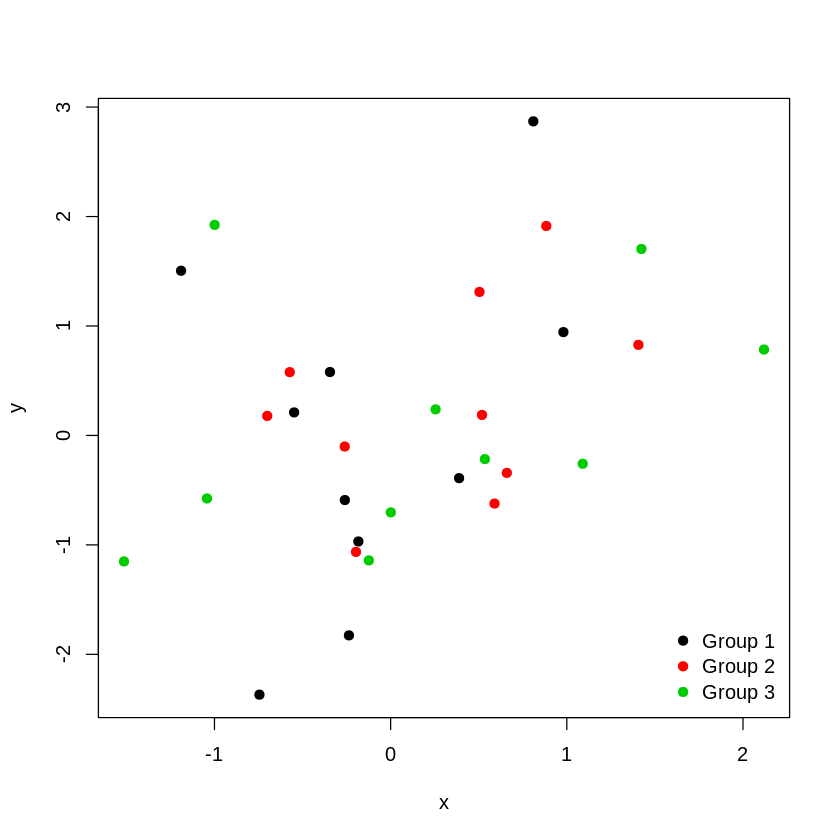

In [39]:
set.seed(19)
x <- rnorm(30)
y <- rnorm(30)
plot(x, y, col = rep(1:3, each = 10), pch = 19)
legend("bottomright", legend = paste("Group", 1:3), col = 1:3, pch = 19, bty = "n")